<img src="valorumdata.svg" height="100px" width="200px" style="float: right;"/>

# Pandas: reshape
---

**Prerequisites**

- [Pandas intro](./intro.ipynb)
- [Pandas basics](./basics.ipynb)
- [Importance of index](./the_index.ipynb)

**Outcomes**

- Understand and be able to apply the `melt`/`stack`/`unstack`/`pivot` methods

---
    


In [1]:
import numpy as np
import pandas as pd
import valorum

## Reshaping your data

The data you receive is not always in the "shape" that you'd like

What do we mean by shape? We mean the number of rows and columns in a DataFrame and how information is stored in the index and column names

This lecture will teach you the basic concepts of reshaping data

As with other topics, we recommend reviewing the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reshaping.html) on this subject for additional information

We will keep our discussion here as brief and simple as possible because these tools will appear repeatedly in subsequent notebooks

In [2]:
# made up
# columns A and B are "identifiers" and C, D, and E are variables
df = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": "x y x z".split(),
    "C": [1, 2, 1, 4],
    "D": [10, 20, 30, 20,],
    "E": [2, 1, 5, 4,]
})

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
A    4 non-null int64
B    4 non-null object
C    4 non-null int64
D    4 non-null int64
E    4 non-null int64
dtypes: int64(4), object(1)
memory usage: 240.0+ bytes


A  B  C   D  E
0  0  x  1  10  2
1  0  y  2  20  1
2  1  x  1  30  5
3  1  z  4  20  4

In [3]:
bball = pd.DataFrame({
    "Year": [2015, 2016, 2017]*2,
    "Player": ["Curry"]*3 + ["Durant"]*3,
    "Team": ["GSW"]*3 + ["OKC"] + ["GSW"]*2,
    "Pts": [30.1, 25.3, 27.1, 28.2, 25.1, 25.9],
    "Assist": [6.7, 6.6, 6.4, 5.0, 4.8, 5.3],
    "Rebound": [4.5, 3.9, 3.4, 4.4, 6.5, 7.6]
})

bball.info()
bball

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
Assist     6 non-null float64
Player     6 non-null object
Pts        6 non-null float64
Rebound    6 non-null float64
Team       6 non-null object
Year       6 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 368.0+ bytes


Assist  Player   Pts  Rebound Team  Year
0     6.7   Curry  30.1      4.5  GSW  2015
1     6.6   Curry  25.3      3.9  GSW  2016
2     6.4   Curry  27.1      3.4  GSW  2017
3     5.0  Durant  28.2      4.4  OKC  2015
4     4.8  Durant  25.1      6.5  GSW  2016
5     5.3  Durant  25.9      7.6  GSW  2017

### Long vs wide

Many of these operations will think about changing long (wide) DataFrames to wide (long) DataFrames

What does it mean for a DataFrame to be long or wide?

Here is long possible long form representation of our basketball data

In [4]:
# Don't worry about what this command does -- We'll see it soon
long = bball.melt(id_vars=["Year", "Player", "Team"])

long

Year  Player Team variable  value
0   2015   Curry  GSW   Assist    6.7
1   2016   Curry  GSW   Assist    6.6
2   2017   Curry  GSW   Assist    6.4
3   2015  Durant  OKC   Assist    5.0
4   2016  Durant  GSW   Assist    4.8
5   2017  Durant  GSW   Assist    5.3
6   2015   Curry  GSW      Pts   30.1
7   2016   Curry  GSW      Pts   25.3
8   2017   Curry  GSW      Pts   27.1
9   2015  Durant  OKC      Pts   28.2
10  2016  Durant  GSW      Pts   25.1
11  2017  Durant  GSW      Pts   25.9
12  2015   Curry  GSW  Rebound    4.5
13  2016   Curry  GSW  Rebound    3.9
14  2017   Curry  GSW  Rebound    3.4
15  2015  Durant  OKC  Rebound    4.4
16  2016  Durant  GSW  Rebound    6.5
17  2017  Durant  GSW  Rebound    7.6

And here is a wide form version

In [5]:
# Again, don't worry about this command... We'll see it soon too
long.pivot_table(index="Year", columns=["Player", "Team", "variable"], values="value")

Player    Curry               Durant                                   
Team        GSW                  GSW                  OKC              
variable Assist   Pts Rebound Assist   Pts Rebound Assist   Pts Rebound
Year                                                                   
2015        6.7  30.1     4.5    NaN   NaN     NaN    5.0  28.2     4.4
2016        6.6  25.3     3.9    4.8  25.1     6.5    NaN   NaN     NaN
2017        6.4  27.1     3.4    5.3  25.9     7.6    NaN   NaN     NaN

## `set_index`, `reset_index`, and transpose

We have already seen a few of the most basic methods for reshaping a DataFrame 

* `set_index`
* `reset_index`
* `T`

Sometimes the simplest approach is the right approach

In [6]:
df2 = df.set_index(["A", "B"])
df2.head()

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [7]:
df3 = df2.T
df3.head()

A   0       1    
B   x   y   x   z
C   1   2   1   4
D  10  20  30  20
E   2   1   5   4

## `stack` and `unstack`

The `stack` and `unstack` methods operate directly on the index/columns

In some ways, `stack`, `unstack`, `set_index`, and `reset_index` are the "most fundamental" reshaping operations... The other operations we talk about can be formulated in terms of these four operations (and, in fact, some of them are exactly written as these operations in `pandas`'s code base)

`stack` is used to move certain levels of the columns into the index (i.e. moving from wide to long) and `unstack` moves levels of the index into the columns (i.e. moving from long to wide)

Below is an animation that shows how stacking works

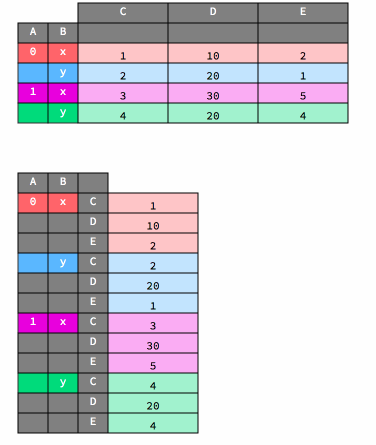

In [8]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [9]:
df2_stack = df2.stack()
df2_stack

A  B   
0  x  C     1
      D    10
      E     2
   y  C     2
      D    20
      E     1
1  x  C     1
      D    30
      E     5
   z  C     4
      D    20
      E     4
dtype: int64

And here is an animation that shows how unstacking works


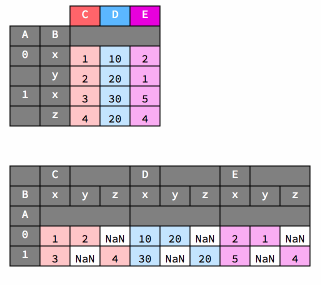

In [10]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [11]:
df2.unstack()

C               D                E          
B    x    y    z     x     y     z    x    y    z
A                                                
0  1.0  2.0  NaN  10.0  20.0   NaN  2.0  1.0  NaN
1  1.0  NaN  4.0  30.0   NaN  20.0  5.0  NaN  4.0

In this example, we have multiple levels of indexes to start with. We will be able to move some or all of these index levels to the columns

When we use `unstack` without any options it only moves the innermost index (the one closest to the data)

Sometimes we will want to move different elements of the index into the columns

`pandas` allows us to choose which level of index to unstack by using the keyword argument `level`

In [12]:
df2.unstack(level=0)

C          D          E     
A    0    1     0     1    0    1
B                                
x  1.0  1.0  10.0  30.0  2.0  5.0
y  2.0  NaN  20.0   NaN  1.0  NaN
z  NaN  4.0   NaN  20.0  NaN  4.0

In [13]:
# can also specify by name, if our index levels have names
df3 = df2.unstack(level="B")
df3

C               D                E          
B    x    y    z     x     y     z    x    y    z
A                                                
0  1.0  2.0  NaN  10.0  20.0   NaN  2.0  1.0  NaN
1  1.0  NaN  4.0  30.0   NaN  20.0  5.0  NaN  4.0

**Exercise**:

- Using the `stack` method on `df3`, move the columns `(C, D, E)` into the index. Hint: You will need to use the level argument we just talked about.
- What happens when you run the code `df2.unstack(level=[0, 1])`? What could you use instead of `[0, 1]` to produce the same output?
- Read the `unstack` documentation about the argument `fill_value`. What do you think will happen with `df2.unstack(level="B", fill_value=0.0)`?

## `melt`

The `melt` method is used to move from wide DataFrames to long DataFrames

It can be used to move all of the "values" stored in your DataFrame to a single column with all other columns being used to contain identifying information

Warning: When you use `melt` any index that you currently have will be deleted

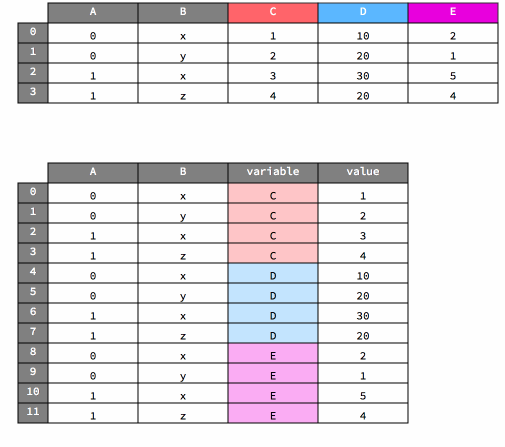

In [14]:
df

A  B  C   D  E
0  0  x  1  10  2
1  0  y  2  20  1
2  1  x  1  30  5
3  1  z  4  20  4

In [15]:
df_melted = df.melt(id_vars=["A", "B"])
df_melted

A  B variable  value
0   0  x        C      1
1   0  y        C      2
2   1  x        C      1
3   1  z        C      4
4   0  x        D     10
5   0  y        D     20
6   1  x        D     30
7   1  z        D     20
8   0  x        E      2
9   0  y        E      1
10  1  x        E      5
11  1  z        E      4

**Exercise**:

- What do you think would happen if we wrote `df.melt(id_vars=["A"])` rather than `df.melt(id_vars=["A", "B"])`? Is that what happened? Talk about why or why not with your neighbor
- Read the documentation and focus on the argument `value_vars`. How does `df.melt(id_vars=["A", "B"], value_vars=["C", "D"])` differ from `df.melt(id_vars=["A", "B"])`?
- Explain the differences between `df2.stack()` and `df2.melt()` to your neighbor. Is there a way to make them generate the same output (Hint: you might need to use both `stack` and another method from above)?


## `pivot` and `pivot_table`

The next two methods that we will use for reshaping are closely related

Some of you might even already be familiar with these ideas because you have previously used _pivot tables_ in Excel

* If so, good news. We think this is even more powerful than in Excel and easier to use!
* If not, good news. We are about to teach you a very powerful and easy to use tool

We will begin with `pivot`.

The `pivot` method

* Takes the unique values of one column and places them along the index
* Takes the unique values of another column and places them along the columns
* Takes the values that correspond to a third column and fills in the DataFrame values that correspond to that index/column pair.

It is best to learn by example (and excruciating amounts of practice)

In [16]:
df

A  B  C   D  E
0  0  x  1  10  2
1  0  y  2  20  1
2  1  x  1  30  5
3  1  z  4  20  4

In [17]:
df.pivot(index="A", columns="B", values="E")

B    x    y    z
A               
0  2.0  1.0  NaN
1  5.0  NaN  4.0

A `pivot` is very similar to unstacking one level of an index for a Series

We replicate the `pivot` behavior below using `df2`

In [18]:
df2

C   D  E
A B          
0 x  1  10  2
  y  2  20  1
1 x  1  30  5
  z  4  20  4

In [19]:
sr = df2["C"]
sr.unstack(level="B")

B    x    y    z
A               
0  1.0  2.0  NaN
1  1.0  NaN  4.0

One important thing to be aware of is that in order for `pivot` to work, the index/column pairs must be _unique_!

Below we demonstrate the error that comes up when they are not unique

In [20]:
df.pivot(index="B", columns="C", values="E")

ValueError: Index contains duplicate entries, cannot reshape

**Exercise**:


- Draw what you think the output of `df.pivot(index="D", columns="A", values="C")` will look like
- What happens if we exclude `value="C"` from the command above?
- What happens when you run `df.set_index(["B", "C"]).unstack(level="C")`? Explain to your neighbor why this happened

The `pivot_table` method is simply a generalization of `pivot`

It overcomes two weaknesses of `pivot`:

1. It allows you to choose multiple columns for the index/columns/values arguments.
2. It allows you to deal with the problem of having duplicate entries by having you choose how to combine them

In [21]:
df

A  B  C   D  E
0  0  x  1  10  2
1  0  y  2  20  1
2  1  x  1  30  5
3  1  z  4  20  4

Notice that we can replicate the functionality of `pivot` with no changes.

In [22]:
df.pivot(index="A", columns="B", values="E")

B    x    y    z
A               
0  2.0  1.0  NaN
1  5.0  NaN  4.0

In [23]:
df.pivot_table(index="A", columns="B", values="E")

B    x    y    z
A               
0  2.0  1.0  NaN
1  5.0  NaN  4.0

But we can also choose multiple columns to be used in index/columns/values

In [24]:
df.pivot_table(index=["A", "B"], columns="C", values="D")

C       1     2     4
A B                  
0 x  10.0   NaN   NaN
  y   NaN  20.0   NaN
1 x  30.0   NaN   NaN
  z   NaN   NaN  20.0

In [25]:
df.pivot_table(index="A", columns=["B", "C"], values="D")

B     x     y     z
C     1     2     4
A                  
0  10.0  20.0   NaN
1  30.0   NaN  20.0

AND we can deal with duplicated index/column pairs

In [26]:
# This produced an error
# df.pivot(index="B", columns="C", values="E")

# This doesn't!
df_pt = df.pivot_table(index="B", columns="C", values="E")

The way it deals with the fact that multiple values can belong in a single box is by combining them with some type of reduction

The default reduction is to take the mean of all observations that correspond to that index/column pair

Our duplicated index/column pair is `("x", 1)` and had values 2 and 5

Now `df_pt.loc["x", 1]` is $\frac{2 + 5}{2} = 3.5$

But wait, there's more

We can actually choose how `pandas` aggregates all of the values

For example, maybe we wanted to keep the maximum value. Maybe the minimum. Maybe we wanted to count how many values there were

In [27]:
df.pivot_table(index="B", columns="C", values="E", aggfunc=np.max)

C    1    2    4
B               
x  5.0  NaN  NaN
y  NaN  1.0  NaN
z  NaN  NaN  4.0

In [28]:
df.pivot_table(index="B", columns="C", values="E", aggfunc=len)

C    1    2    4
B               
x  2.0  NaN  NaN
y  NaN  1.0  NaN
z  NaN  NaN  1.0

We can even pass multiple functions to use for aggregating values!

In [29]:
df.pivot_table(index="B", columns="C", values="E", aggfunc=[np.max, len])

amax            len          
C    1    2    4    1    2    4
B                              
x  5.0  NaN  NaN  2.0  NaN  NaN
y  NaN  1.0  NaN  NaN  1.0  NaN
z  NaN  NaN  4.0  NaN  NaN  1.0

**Exercise**:


- First, take a breath... That was a lot to take in
- Can you think of a reason to ever use `pivot` rather than `pivot_table`? Discuss with your neighbors
- Create a pivot table with column `A` as the index, `B` as the columns, and `C` as the values. What happens when you use `aggfunc=[np.max, np.min, len]`. Discuss how Python produced each of the values in the pivot table you see with your neighbors